# SWEDISH ENTREPRENEURSHIP WORD NETS
## I: Sententially Co-Occurring Topic Modeling Terms 

## By Moses Boudourides & Karl Wennberg

In [1]:
import os
import random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx, community, pygraphviz
np.random.seed(2018)
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
from string import punctuation, digits
import nltk
# nltk.download('wordnet')
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.corpora import Dictionary
import pyLDAvis
from pyLDAvis import gensim as pgensim
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

### Load Data

In [2]:
filename = "data/entrepreneur1995.txt"
titlename = "The Swedish Entrepreneurship Data"
f = codecs.open(filename, "r", encoding="utf-8").readlines()
num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)

The Swedish Entrepreneurship Data has number of words = 77978 (and number of characters/symbols = 558998)


In [3]:
filenames = ["data/entrepreneur1995.txt","data/entrepreneur2005.txt","data/entrepreneur2019.txt",
             "data/startup1995.txt","data/startup2005.txt","data/startup2019.txt"]
titlename = "The Swedish Entrepreneurship Data"

F=[]
num_lines = 0
num_words = 0
num_chars = 0
for filename in filenames:
    f = codecs.open(filename, "r", encoding="utf-8").readlines()
    for line in f:
        words = line.split()
        num_lines += 1
        num_words += len(words)
        num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)
# print "%s has number of words = %i" %(titlename,num_words)
# blob = TextBlob("\n".join(f))

The Swedish Entrepreneurship Data has number of words = 469876 (and number of characters/symbols = 3267302)


In [4]:
text=[]
for filename in filenames:
    f = codecs.open(filename, "r", encoding="utf-8").readlines()
    textf="\n".join(f).split("==============================================================================")
    text.append(textf)
for textf in text:
    print text.index(textf),len(textf),type(textf)

docs_d={}
for i,j in enumerate(text):
    if i==0:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur1995"+str(ii+1)]=jj
    if i==1:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur2005"+str(ii+1)]=jj
    if i==2:
        for ii,jj in enumerate(j):
            docs_d["Entrepreneur2019"+str(ii+1)]=jj
    if i==3:
        for ii,jj in enumerate(j):
            docs_d["Startup1995"+str(ii+1)]=jj
    if i==4:
        for ii,jj in enumerate(j):
            docs_d["Startup2005"+str(ii+1)]=jj
    if i==5:
        for ii,jj in enumerate(j):
            docs_d["Startup2019"+str(ii+1)]=jj
print len(docs_d)
docs=docs_d.values()
print len(docs)
# docs

0 180 <type 'list'>
1 598 <type 'list'>
2 86 <type 'list'>
3 1 <type 'list'>
4 4 <type 'list'>
5 123 <type 'list'>
992
992


### Extraction of Terms from Topic Modeling

In [5]:
excluded = stopwords.words('swedish') + list(punctuation) 

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in excluded and not w.isdigit()] #stop_words
 
vocabulary = set()
for i in docs:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs)
 
print VOCABULARY_SIZE, DOCUMENTS_COUNT  #All: 43062 992

43062 992


In [6]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [7]:
documents=docs
doc_sample = documents[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
[u'\r\n\n\r\n\nSTENHAMMAR', u'BLIR', u'OS-GENERAL\r\n\nTidningarnas', u'Telegrambyr\xe5,', u'1995-12-07', u'04:38\r\n\nPublicerat', u'i', u'print.', u'\r\n\n\r\n\nOlof', u'Stenhammar,', u'VD', u'och', u'grundare', u'av', u'OM', u'(Optionsm\xe4klarna)', u'blir', u'OS-', u'-general', u'f\xf6r', u'Stockholms', u'\r\n\nkandidatur', u'till', u'sommarspelen', u'2004.\r\n\n\r\n\nHan', u'kommer', u'sannolikt', u'att', u'presenteras', u'officiellt', u'p\xe5', u'en', u'presskonferens', u'i', u'Stockholms', u'\r\n\nstadshus', u'p\xe5', u'torsdagen,', u'skriver', u'Svenska', u'Dagbladet.', u'Olof', u'Stenhammar', u'blir', u'verkst\xe4llande', u'\r\n\ndirekt\xf6r', u'f\xf6r', u'det', u'nya', u'OS-', u'-aktiebolaget', u'som', u'skall', u'leda', u'Stockholms', u'ans\xf6kan.', u'\r\n\nStenhammar', u'startade', u'OM', u'i', u'mitten', u'av', u'1980-talet', u'och', u'f\xf6retaget', u'blev', u'snabbt', u'en', u'stor', u'\r\n\nframg\xe5ng.', u'Han', u's\xe4gs', u'vara', u'en', u'skickl

In [8]:
rd={}
# {u"kenni":u"kenny",u"kennedi":u"kennedy",u"jewelri":u"jewelry",u"dolli":u"dolly",u"jerri":u"jerry",
#     u"scari":u"scary",u"academi":u"academi",u"societi":u"society",u"sothebi":u"sotheby",u"beverli":u"beverly",u"lobbi":u"lobby"}

pdocs=[preprocess(doc) for doc in documents]

ppdocs=[]
for s in pdocs:
    for i in range(len(s)):
        for k in rd.keys():  #,v in rd.items():
            if k == s[i]:
                s[i]=rd[k]
    ppdocs.append(s)

# for s in ppdocs:
#     for i in range(len(s)):
#         for k,v in rd.items():
#             if k == s[i]:
#                 print k

In [9]:
# processed_docs = [preprocess(doc) for doc in documents]
# processed_docs[:10]

excl=[u"stor",u"utgivar",u"retriev",u"dagbladet",u"fram",u"hela",u"efter",u"annat",u"vara",u"namn",
      u"sida",u"artikeln",u"allt",u"nyhet",u"print",u"publicerat",u"http",u"dagen",u"info",u"finn",
      u"vill",u"kommer",u"enligt",u"andra",u"ocks",u"samma",u"sedan",u"sektion",u"hade",u"egna",
      u"fredric",u"bara",u"mycket",u"fler",u"bildtext",u"blir",u"enskild",u"skull",u"lite",u"bland",
      u"person",u"utgivaren",u"peter",u"sitt",u"expressen",u"stora",u"sydsvenskan",u"genom",
      u"aftonbladet",u"uten",u"mellan",u"bonnier",u"familj",u"sina",u"kansk",u"fick",u"blev",
      u"talet",u"tidigar",u"flera",u"helt",u"varit",u"inom",u"henn",u"detta",u"kunna",u"mest",
      u"wolodarski",u"olika",u"olsson",u"gjord",u"rehnquist",u"redan",u"varj",u"tror",u"vilket",
      u"maria",u"sofia",u"inget",u"eftersom",u"aldrig",u"fyra",u"senar",u"samtidigt",u"tycker",
      u"karn"]

# starts with u"..."
processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print len(allw) #All 32501
# processed_docs[:10]

32417


In [10]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print len(dictionary) #All 32368
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

32417
(3738, u'vanligast')
(15436, u'nallen')
(16148, u'nordisk')
(18770, u'exkluderar')
(455, u'\xf6rtendahl')
(26327, u'suzann')
(20342, u'poliscanova')
(7643, u'hanterligt')
(12541, u'riskvilliga')
(26203, u'scola')
(14227, u'huvudsaken')


In [11]:
dictionary.filter_extremes(no_below=2, no_above=2, keep_n=300)
#                            keep_n=100000) #3 0.7 | 15 0.5
len(dictionary) #All 15838 [2: 10955 with keep_n=100000]

300

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [13]:
nt=4 #number_of_topics
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [14]:
topics = lda_model.print_topics(num_words=100) #350

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
import re
for s in lt:
    for ss in s:
        if re.sub(r'[^a-zA-Z]','', ss) not in terms:
            terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=sorted(terms)
print len(terms)
print
print "LIST OF TM TERMS:"
print
for i in terms:
    print i

184

LIST OF TM TERMS:

alla
alltid
ander
anna
annan
artiklar
avtalslicen
barn
bde
behver
berttar
bjrn
blivit
bolag
bolaget
bort
brjade
brjan
bttre
bygga
chef
cirka
dag
databasen
delar
denna
dera
dessutom
distribuera
ditt
dock
drfr
drygt
egen
eget
eller
entreprenr
erik
europa
exempel
fall
familjen
finna
fljer
folk
framtiden
fre
fretag
fretaget
frfattar
frn
frra
frsta
ftt
gener
gick
gjort
glland
gller
gng
godknnand
gott
gra
granstrm
grundar
gteborg
gtt
haft
han
handlar
hitta
honom
igen
ingen
ingr
innan
int
investerar
johan
karn
kla
knna
komma
kommun
kopiera
kring
kronor
kultur
kund
kvinnor
landet
ligger
lika
lngre
lngt
lycka
marknaden
medgivand
medium
menar
miljard
miljon
mindr
minst
mitt
mnga
mnniskor
mste
ngon
ngot
ngra
nnu
nringsliv
nrmast
nsta
nstan
nyhetsbyrn
nytt
ocks
ofta
olsn
ordfrand
organisationen
pengar
plat
politik
problem
procent
ren
ret
riktigt
rtt
runt
samt
samtliga
senast
sga
sger
sista
sjlv
sjlva
sjlvklart
skall
skapa
skriver
skyddad
slut
sociala
srskilt
startup
std
stl

In [15]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.064*"int" + 0.057*"till" + 0.045*"eller" + 0.043*"från" + 0.038*"artiklar" + 0.024*"alla" + 0.020*"något" + 0.018*"skyddad" + 0.018*"säger" + 0.015*"databasen"
Topic: 1 
Words: 0.057*"svenska" + 0.055*"till" + 0.038*"eller" + 0.038*"int" + 0.027*"artiklar" + 0.025*"från" + 0.024*"alla" + 0.023*"entreprenör" + 0.022*"utan" + 0.021*"karén"
Topic: 2 
Words: 0.054*"int" + 0.054*"från" + 0.053*"till" + 0.047*"eller" + 0.041*"artiklar" + 0.030*"alla" + 0.021*"skyddad" + 0.021*"databasen" + 0.018*"något" + 0.017*"följer"
Topic: 3 
Words: 0.068*"till" + 0.047*"int" + 0.031*"från" + 0.020*"eller" + 0.019*"säger" + 0.015*"också" + 0.015*"över" + 0.014*"alla" + 0.014*"sverig" + 0.013*"många"


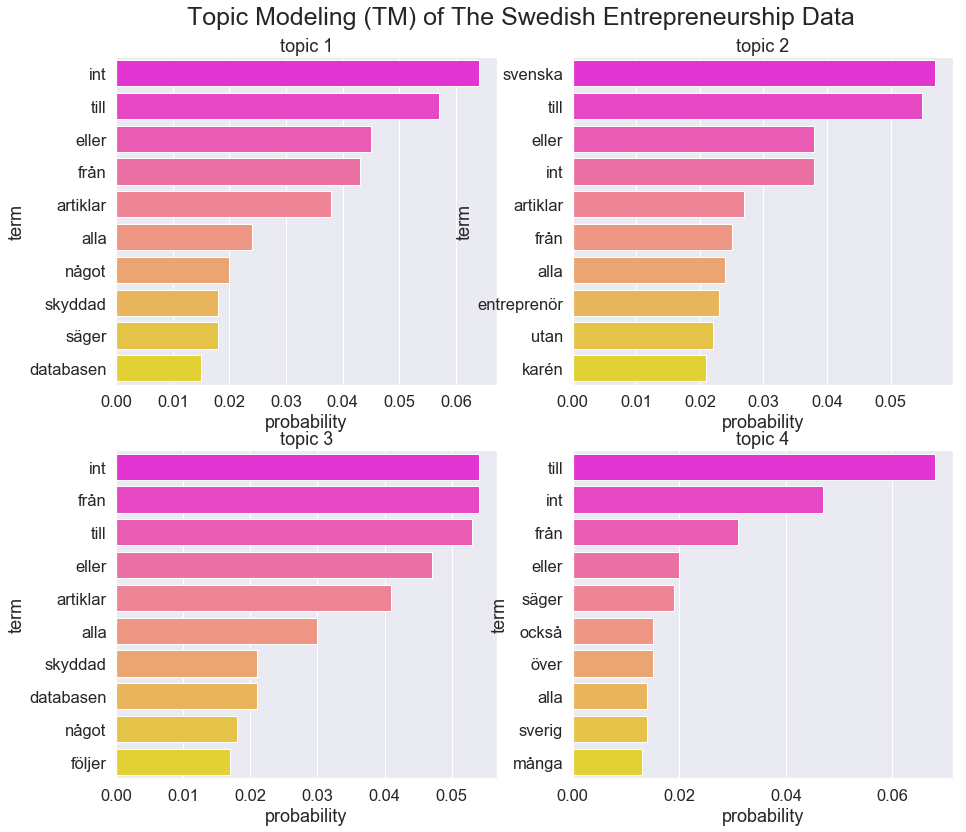

In [16]:
plt.figure(figsize=(15,35)) #figsize=(15,2.4*15*((nt+1)/4))); #15
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
    plt.subplot(nt+1,2,i+1); #5
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
sst="Topic Modeling (TM) of %s" %titlename
plt.suptitle(sst,fontsize=25, y=0.90);
plt.show()

In [17]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      49.156212        1       1  0.058538  0.020523
1      29.215586        1       2  0.041205 -0.028691
2      18.138580        1       3 -0.076313 -0.003257
0       3.489620        1       4 -0.023431  0.011425, topic_info=    Category         Freq         Term        Total  loglift  logprob
144  Default  3407.000000          int  3407.000000  30.0000  30.0000
258  Default  4503.000000         till  4503.000000  29.0000  29.0000
256  Default  2271.000000        eller  2271.000000  28.0000  28.0000
38   Default  2488.000000         från  2488.000000  27.0000  27.0000
238  Default  1551.000000     artiklar  1551.000000  26.0000  26.0000
205  Default  1791.000000      svenska  1791.000000  25.0000  25.0000
166  Default  1492.000000         alla  1492.000000  24.0000  24.0000
158  Default   667.000000        något   667.000000  23.0000  23.0000
41   Default   784.000000      skyddad   784.000000  22.0000  22.0000
228  Default   683.000000    databasen   683.000000  21.0000  21.0000
5    Default  1161.000000        säger  1161.000000  20.0000  20.0000
74   Default   774.000000       sverig   774.000000  19.0000  19.0000
217  Default   281.000000     särskilt   281.000000  18.0000  18.0000
193  Default   273.000000       följer   273.000000  17.0000  17.0000
43   Default   261.000000      gälland   261.000000  16.0000  16.0000
233  Default   253.000000    översätta   253.000000  15.0000  15.0000
164  Default   245.000000       medium   245.000000  14.0000  14.0000
72   Default   245.000000    medgivand   245.000000  13.0000  13.0000
174  Default   242.000000     överföra   242.000000  12.0000  12.0000
295  Default   239.000000  avtalslicen   239.000000  11.0000  11.0000
1    Default   232.000000      kopiera   232.000000  10.0000  10.0000
42   Default   973.000000         utan   973.000000   9.0000   9.0000
219  Default   227.000000    granström   227.000000   8.0000   8.0000
212  Default   225.000000          kla   225.000000   7.0000   7.0000
223  Default   719.000000        karén   719.000000   6.0000   6.0000
46   Default   868.000000  entreprenör   868.000000   5.0000   5.0000
186  Default   831.000000         över   831.000000   4.0000   4.0000
64   Default   581.000000    stockholm   581.000000   3.0000   3.0000
20   Default   567.000000          han   567.000000   2.0000   2.0000
127  Default   466.000000       kronor   466.000000   1.0000   1.0000
..       ...          ...          ...          ...      ...      ...
73    Topic4     3.058325       slutet    54.351852   0.4778  -6.7342
297   Topic4     6.668568        johan   128.945099   0.3934  -5.9546
249   Topic4     4.376301       länder    84.908066   0.3900  -6.3758
157   Topic4     3.683795         emot    71.941910   0.3835  -6.5481
214   Topic4     4.276093      ekonomi    84.181061   0.3754  -6.3990
256   Topic4   114.468758        eller  2271.848877   0.3673  -3.1117
74    Topic4    38.931198       sverig   774.847717   0.3645  -4.1902
77    Topic4     5.554296        hitta   112.458382   0.3474  -6.1375
144   Topic4   164.976349          int  3407.569824   0.3274  -2.7462
187   Topic4     3.226190       kultur    67.005951   0.3219  -6.6807
211   Topic4     7.096548      började   152.680069   0.2866  -5.8924
131   Topic4     6.190952        drygt   133.406631   0.2851  -6.0290
49    Topic4     6.694908         fall   144.319458   0.2847  -5.9507
129   Topic4     5.291702      politik   114.892258   0.2775  -6.1859
118   Topic4     4.066920        antal    89.527718   0.2637  -6.4492
38    Topic4   110.182243         från  2488.406250   0.2381  -3.1499
166   Topic4    60.867622         alla  1492.470337   0.1559  -3.7433
64    Topic4    24.329117    stockholm   581.500000   0.1814  -4.6604
5     Topic4    45.104454        säger  1161.864868   0.1066  -4.0431
258   Topic4   146.380829         till  4503.158203  -0.0709  -

In [18]:
ted={}
for k,v in docs_d.items():
    t=[]
    for w in terms: 
        if w in v:
            if w not in t:
                t.append(w)
    ted[k]=sorted(t)
print len(ted)
# for k,v in ted.items():
#     print k,v

992


In [19]:
freq=[]
for k in terms: 
    s=0
    for kk,v in docs_d.items():
        v=v.lower()
        s+=v.count(k)
    freq.append(s)
trf_df = pd.DataFrame(
    {'Term': terms, 
     'Frequency of Occurrences': freq
    })
trf_df=trf_df[['Term','Frequency of Occurrences']]
trf_df=trf_df.sort_values(by ='Frequency of Occurrences',ascending=False)
trf_df=trf_df[trf_df["Frequency of Occurrences"]>100]
print len(trf_df)
trf_df

119


,Term,Frequency of Occurrences
172,ver,7276
128,ren,6114
76,int,5820
164,till,5766
129,ret,4734
68,han,4596
171,ven,3815
22,dag,3747
80,kla,3703
154,str,3398


In [20]:
trf_df.to_csv('terms_freqs.csv')

In [21]:
tterms=sorted(set(terms+trf_df['Term'].tolist()[:70]))
print len(tterms)
print tterms==terms
# print
# print "LIST OF TM TERMS"
# print
# for i in sorted(tterms):
#     print i

184
True


In [22]:
# tterms = [
# ]

### The graph of co-occurrent TM terms

In [23]:
medges=[]
for k,v in docs_d.items():
    sent_text = nltk.sent_tokenize(v)
    for sent in sent_text:
        for j in itertools.combinations(tterms, 2):
            if j[0] in sent and j[1] in sent:
                medges.append((j[0],j[1],k))
print len(medges),len(set(medges))
# medges

167662 138308


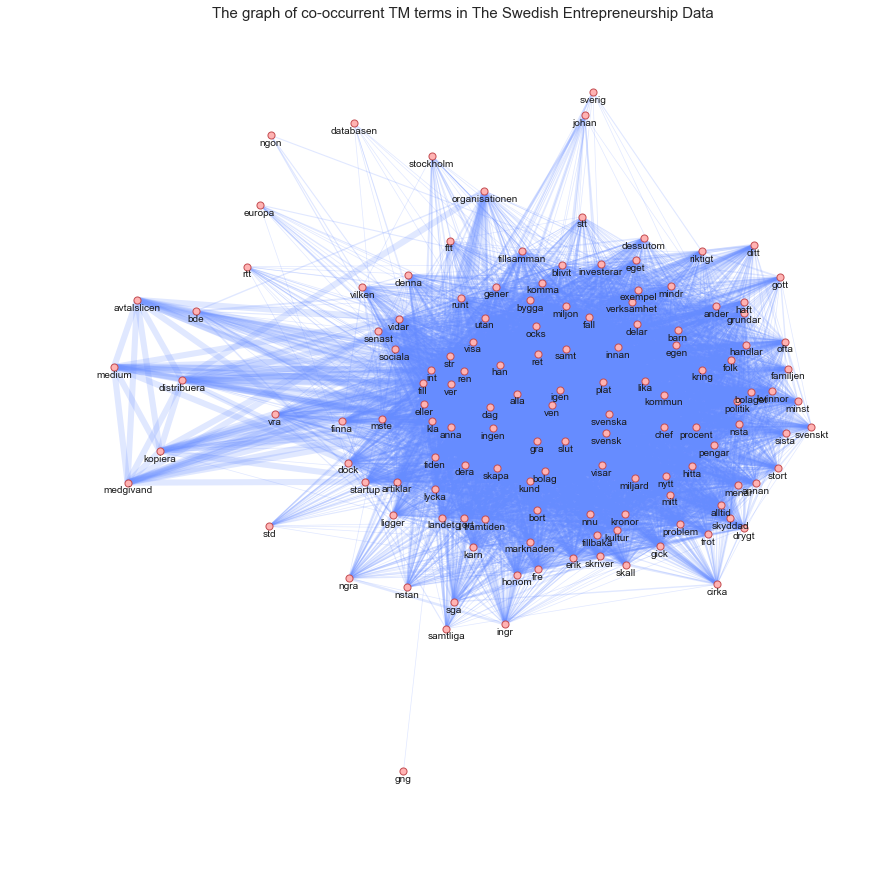

In [24]:
G = nx.MultiGraph()
G.add_edges_from(medges)
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
# elabels = nx.get_edge_attributes(Gw,'weight')
edge_width=[math.log(1+w) for w in edge_width]
# [3*w for w in edge_width] 

figsize=(15,15)
pos=graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
G=Gw
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=50)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -3 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=10);
sst="The graph of co-occurrent TM terms in %s" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [25]:
print len(G),len(G.edges())

136 6067


### Clustering keywords as communities of the co-occurrence graph

In [26]:
G=Gw

partition = community.best_partition(G)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, G, weight='weight')
print 'The graph has', kk, 'communities and modularity coefficient equal to', modularity

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 

The graph has 2 communities and modularity coefficient equal to 0.21534816059
Community 0 with 120 nodes: [u'exempel', u'rtt', u'ngon', u'dera', u'trot', u'alla', u'handlar', u'miljon', u'skall', u'nytt', u'ven', u'ditt', u'dag', u'senast', u'haft', u'dock', u'fall', u'innan', u'lika', u'runt', u'vilken', u'komma', u'stockholm', u'denna', u'bygga', u'sverig', u'investerar', u'hitta', u'bort', u'startup', u'svenska', u'chef', u'svenskt', u'menar', u'finna', u'folk', u'barn', u'bde', u'riktigt', u'ftt', u'ret', u'sista', u'nstan', u'gener', u'gng', u'europa', u'annan', u'mitt', u'verksamhet', u'slut', u'vra', u'ocks', u'kronor', u'drygt', u'problem', u'gott', u'kommun', u'honom', u'han', u'marknaden', u'tillbaka', u'mindr', u'ander', u'kund', u'miljard', u'svensk', u'gick', u'cirka', u'sga', u'mste', u'skapa', u'bolaget', u'lycka', u'fre', u'ingen', u'bolag', u'stort', u'int', u'visar', u'igen', u'kultur', u'dessutom', u'blivit', u'pengar', u'tillsamman', u'alltid', u'eget', u'framtiden'

In [27]:
pos0=nx.circular_layout(nx.cycle_graph(4))

ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for p,q in list(eocmd):
    if p==0:
        c1=list(list(q)[0])
    if p==1:
        c2=list(list(q)[0])
#     if p==2:
#         c3=list(list(q)[0])
#     if p==3:
#         c4=list(list(q)[0])

G1=Gw.subgraph(c1)
pos1=nx.circular_layout(G1) #.spring_layout(G1,1.)

G2=Gw.subgraph(c2)
pos2=nx.circular_layout(G2) #.spring_layout(G2,1.)

# G3=Gw.subgraph(c3)
# pos3=nx.circular_layout(G3) #.spring_layout(G3,1.)

# G4=Gw.subgraph(c4)
# pos4=nx.circular_layout(G4) #.spring_layout(G4,1.)

# GR=G.subgraph(npR)
# posR=nx.spring_layout(GR,1.)

def re_pos(pos,centre,radius):
    plist=[list(v) for v in pos.values()]
    nplist=[v for v in pos.values()]
    x = [p[0] for p in plist]
    y = [p[1] for p in plist]
    centroid = (sum(x) / float(len(plist)), sum(y) / float(len(plist)))
    ncentroid=np.array(centroid)
    rad=max([np.linalg.norm(nplist[i]-ncentroid) for i in range(len(nplist))])
    rpos={}
    for k,v in pos.items():
        rpos[k]=[(v[0]+centre[0])/float(radius),(v[1]+centre[1])/float(radius)]
    return rpos

centers=pos0.values()
centerm=[]
for i in range(len(centers)):
    t=[]
    for j in centers[i]:
        t.append(3*j)  
    centerm.append(np.array(t))
centers=centerm

radius=2. #1.5
pos1=re_pos(pos1,centers[0],0.5)  
pos2=re_pos(pos2,centers[1],radius)    
# pos3=re_pos(pos3,centers[2],radius) 
# pos4=re_pos(pos4,centers[3],radius)
# posR=re_pos(posR,centers[4],radius)

posAll=dict(pos1.items()+pos2.items()+[(k,pos1[k]+pos2[k]) for k in set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+[(k,pos1[k]+pos2[k]+pos3[k]) for k in set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]) for k in set(pos4)&set(pos3)&set(pos2)&set(pos1)])
# posAll=dict(pos1.items()+pos2.items()+pos3.items()+pos4.items()+posR.items()+[(k,pos1[k]+pos2[k]+pos3[k]+pos4[k]+posR[k]) for k in set(posR)&set(pos4)&set(pos3)&set(pos2)&set(pos1)])

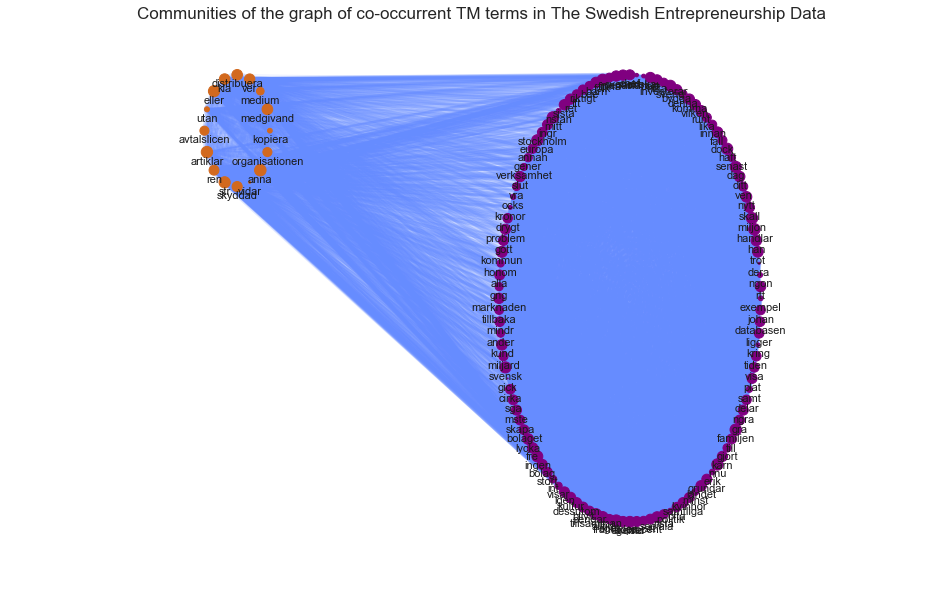

In [28]:
plt.figure(figsize=(16,10))

# pos2['Seven Wonders of the Invisible World']=(-1.4,1.4)
# posAll['Seven Wonders of the Invisible World']=(-1.4,1.4)

# labels={}
# for i in CGwi.nodes():
#     labels[i]=i #''

nsi=[Gw.degree(n) for n in Gw.nodes()]
# nodes = nx.draw_networkx_nodes(CGwi, pos, node_color=node_color,node_size=nsi,node_shape="s")
nx.draw_networkx_nodes(G1,pos=pos1,node_size=nsi,nodelist=c1,node_color='purple',alpha=1.);
nx.draw_networkx_nodes(G2,pos=pos2,node_size=nsi,nodelist=c2,node_color='chocolate',alpha=1.);
# nx.draw_networkx_nodes(G3,pos=pos3,node_size=nsi,nodelist=c3,node_color='lime',alpha=1.);
# nx.draw_networkx_nodes(G4,pos=pos4,node_size=nsi,nodelist=c4,node_color='red',alpha=1.);
# nx.draw_networkx_nodes(GR,pos=posR,node_size=node_size,nodelist=npR,node_color='yellow',alpha=1.);
# nx.draw_networkx_nodes(G12,pos=pos12,node_size=dict(G.in_degree()).values(),nodelist=np12,node_color='orange',alpha=1.);
# nx.draw_networkx_nodes(G13,pos=pos13,node_size=dict(G.in_degree()).values(),nodelist=np13,node_color='violet',alpha=1.);
# nx.draw_networkx_nodes(G23,pos=pos23,node_size=node_size,nodelist=np23,node_color='crimson',alpha=1.);    
# nx.draw_networkx_nodes(G123,pos=pos123,node_size=150,nodelist=np123,node_color='yellow',alpha=1.);    
# nx.draw_networkx_nodes(G7,pos=pos7,node_size=500,nodelist=cmms[7],node_color=ppartition7.values(),font_size=20,alpha=1.);

nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, posAll, edge_color=edge_color,width=edge_width,alpha=0.2)
# nx.draw_networkx_labels(CGwi,posAll,labels=labels,font_size=13); 

# nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth,alpha=0.2);
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=25);



plt.axis('off');
yoffset = {}
y_off = -0.08 # offset on the y axis
for k, v in posAll.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset, font_size=11);
sst="Communities of the graph of co-occurrent TM terms in %s" %titlename 
plt.title(sst,fontsize=17);
plt.margins(x=0.3, y=0.1) 